In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [6]:
df = pd.read_csv('boston_house.csv')
df.head(20)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311.0,15.2,386.71,17.10,18.9


In [3]:
y = df.pop('MEDV')

In [4]:
x = df

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)

In [7]:
poly = PolynomialFeatures(degree=2)

In [8]:
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.fit_transform(x_test)

: 

In [131]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [132]:
model2 = LinearRegression()
model2.fit(x_train_poly, y_train)

LinearRegression()

In [133]:
test_pred = model.predict(x_test)

In [134]:
test_pred_poly = model2.predict(x_test_poly)

In [135]:
def prediction_evaluation(actual, predicted):
    mse = mean_squared_error(actual, predicted)
    rmse = np.sqrt(mean_squared_error(actual, predicted))
    mae = mean_absolute_error(actual, predicted)
    r2 = r2_score(actual, predicted)

    print(f'MSE:{mse}')
    print(f'RMSE:{rmse}')
    print(f'MAE:{mae}')
    print(f'R2_Score:{r2*100}%')

    plt.scatter(actual, predicted, color='r')
    plt.plot([actual.min(), actual.max()], [actual.min(), actual.max()], ls='--', color='k')
    plt.xlabel("actual value")
    plt.ylabel("predicted value")
    plt.title("Test analysis")
    plt.show

MSE:23.616994100563634
RMSE:4.859731895955129
MAE:3.248482087616422
R2_Score:75.55033086871305%


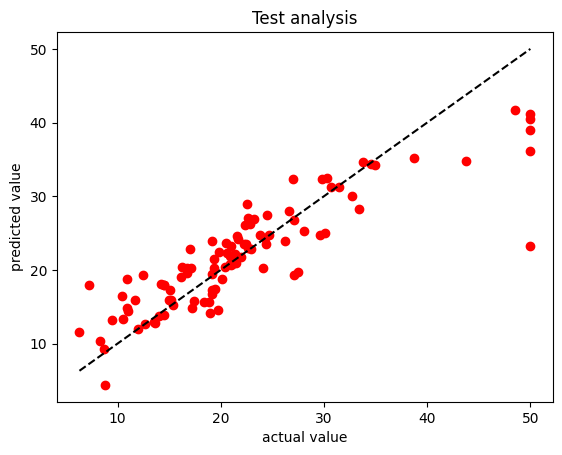

In [136]:
## Linear Regression
prediction_evaluation(y_test, test_pred)

MSE:15.829932042401579
RMSE:3.978684712615663
MAE:2.663900300026288
R2_Score:83.61194489190989%


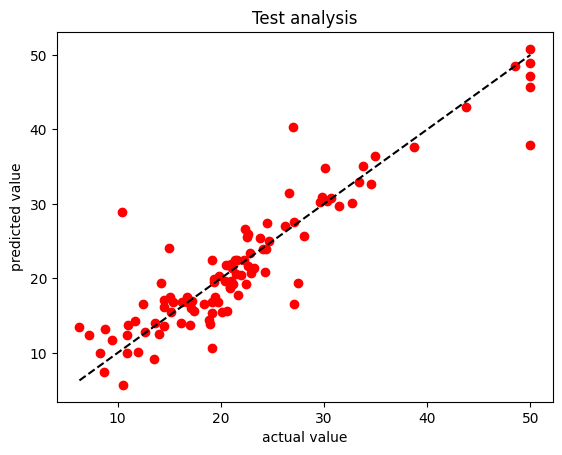

In [137]:
##polynomial regression
prediction_evaluation(y_test, test_pred_poly)


In [138]:
x_train_pred = model2.predict(x_train_poly)

MSE:5.359309394921268
RMSE:2.3150182277730056
MAE:1.6908702136882279
R2_Score:93.40855971487642%


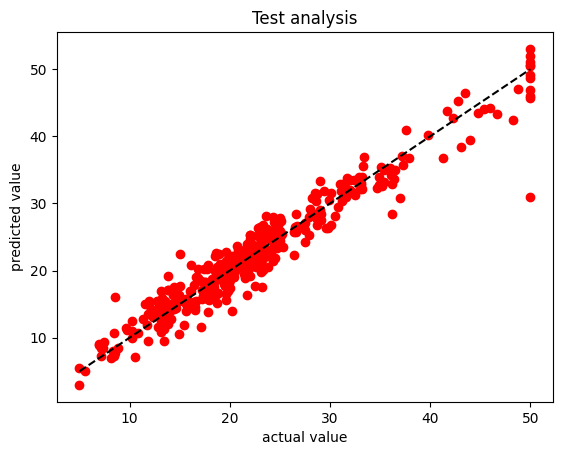

In [139]:
##polynomial regression on the train data (not so useful just to see the high r2 score)
prediction_evaluation(y_train, x_train_pred)